<a href="https://colab.research.google.com/github/LarsBryld/socialdataanalysis2020/blob/master/02806_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import urllib.request as urllib2
from datetime import datetime, timedelta, date

### Get Oxford data and calculate Death Rate

In [0]:
# Import Oxford data and enrich columns for future merging needs
df = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv')
df['Date'] = pd.to_datetime(df['Date'], format="%Y%m%d")
df['DateString'] = df['Date'].apply(lambda x: datetime.strftime(x, "%Y%m%d"))
df['Index'] = df['CountryCode'] + df['DateString']

# Calculate Death Rates
df['DeathRate'] = df['ConfirmedDeaths'] / df['ConfirmedCases'] *100
df

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay,DateString,Index,DeathRate
0,Aruba,ABW,2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00,20200101,ABW20200101,NaN
1,Aruba,ABW,2020-01-02,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00,20200102,ABW20200102,NaN
2,Aruba,ABW,2020-01-03,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00,20200103,ABW20200103,NaN
3,Aruba,ABW,2020-01-04,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00,20200104,ABW20200104,NaN
4,Aruba,ABW,2020-01-05,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00,20200105,ABW20200105,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21988,Kosovo,RKS,2020-05-09,3.0,1.0,2.0,1.0,2.0,1.0,4.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,4.0,0.0,NaN,2.0,NaN,0.0,2.0,1.0,1.0,1.0,0.0,0.0,NaN,862.0,28.0,94.71,94.71,93.57,93.57,20200509,RKS20200509,3.248260
21989,Kosovo,RKS,2020-05-10,3.0,1.0,2.0,1.0,2.0,1.0,4.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,4.0,0.0,NaN,2.0,NaN,0.0,2.0,1.0,1.0,1.0,0.0,0.0,NaN,870.0,28.0,94.71,94.71,93.57,93.57,20200510,RKS20200510,3.218391
21990,Kosovo,RKS,2020-05-11,3.0,1.0,2.0,1.0,2.0,1.0,4.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,4.0,0.0,NaN,2.0,NaN,0.0,2.0,1.0,1.0,1.0,0.0,0.0,NaN,884.0,28.0,94.71,94.71,93.57,93.57,20200511,RKS20200511,3.167421
21991,Kosovo,RKS,2020-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,919.0,29.0,NaN,94.71,NaN,93.57,20200512,RKS20200512,3.155604


### Get Market data and calculate Market Performance

In [0]:
stocks = pd.read_csv('https://raw.githubusercontent.com/LarsBryld/socialdataanalysis2020/master/data/Markets.csv',
                     encoding= 'unicode_escape'
                    )
stocks = stocks.groupby('CountryCode',sort=False).sum()
#stocks = stocks.rename({'United Kingdom': 'United Kingdom'}, axis='index')
#stocks = stocks.drop(columns=['Index ', 'Country/Region'])

columns_new = np.array(stocks.columns)
for i in range(len(columns_new)):
    columns_new[i] = datetime.strptime(columns_new[i],'%d/%m/%Y')

stocks.columns = columns_new

stocks#.loc['United Kingdom']                                                    # TO BE DELETED

,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-11,2020-01-12,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,...,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15
CountryCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CHN,3066,3089,3083,3077,3071,3085,3094,3083,3102,3099,3095,3091,3121,3103,3096,3081,3082,3082,3082,3086,3038,3038,3009,2980,2950,2921,2892,2863,2834,2804,2775,2746,2717,2685,2792,2827,2859,2859,2860,2860,...,3022,3005,2987,2919,3002,2936,2804,2835,2866,2897,2796,2792,2719,2727,2711,2694,2678,2703,2775,2762,2793,2775,2757,2740,2767,2744,2720,2774,2782,2790,2797,2807,2806,2826,2827,2813,2799,2785,2795,2827
AUT,3188,3230,3225,3220,3215,3202,3190,3196,3204,3209,3214,3220,3216,3210,3172,3175,3174,3174,3173,3172,3159,3152,3122,3130,3138,3146,3098,3120,3133,3101,3092,3083,3074,3059,3084,3126,3143,3142,3141,3140,...,2685,2650,2614,2379,2363,2302,1989,1993,1997,2001,1794,1767,1632,1707,1767,1828,1888,1882,2035,2018,2057,2038,2019,2001,1990,2000,1954,1982,1976,1971,1966,2050,2127,2115,2129,2143,2157,2170,2184,2173
BEL,3983,4002,3988,3974,3961,3982,3966,4019,4025,4025,4026,4026,3985,3986,3978,3997,4002,4006,4010,3997,4024,4007,4000,3982,3964,3946,3919,3957,3932,3939,3929,3920,3910,3955,4044,4114,4125,4111,4097,4084,...,3402,3325,3249,3218,3211,3020,2796,2738,2680,2623,2635,2517,2631,2761,2733,2704,2676,2795,2981,2853,2932,2906,2880,2854,2864,2837,2878,2881,2909,2937,2965,3036,3029,3106,3111,3116,3121,3126,3131,3045
DNK,1254,1252,1247,1242,1237,1240,1240,1241,1247,1247,1247,1248,1251,1255,1274,1273,1277,1281,1286,1287,1287,1294,1290,1292,1293,1295,1271,1277,1292,1278,1277,1277,1276,1280,1299,1331,1343,1342,1340,1339,...,1211,1180,1149,1164,1151,1051,1051,1035,1019,1002,1038,1015,1009,1056,1033,1011,989,1026,1069,1055,1080,1081,1083,1085,1136,1112,1120,1116,1129,1142,1155,1165,1155,1158,1161,1164,1167,1170,1173,1185
FIN,4225,4282,4278,4274,4271,4266,4255,4244,4240,4247,4254,4261,4297,4298,4297,4339,4349,4359,4368,4396,4366,4351,4323,4325,4326,4327,4251,4322,4306,4325,4315,4304,4294,4295,4359,4457,4484,4498,4512,4527,...,3836,3731,3625,3624,3572,3321,3196,3126,3055,2985,3016,2931,2904,3133,3068,3004,2939,3012,3223,3207,3291,3268,3245,3222,3284,3277,3287,3279,3295,3310,3326,3428,3419,3482,3492,3502,3512,3522,3532,3532
FRA,6017,6008,6006,6003,6001,6033,5987,6067,6057,6051,6046,6041,6037,6043,6040,6066,6075,6084,6093,6034,6054,5992,6020,5988,5956,5924,5887,5922,5886,5892,5868,5845,5822,5863,5919,6045,6028,6021,6015,6008,...,5118,4981,4845,4771,4716,4375,4234,4119,4003,3887,4041,3906,3834,4067,4001,3935,3869,4088,4340,4333,4434,4410,4386,4362,4438,4260,4244,4205,4236,4267,4299,4489,4397,4512,4521,4529,4537,4545,4554,4512
ITA,23607,23710,23662,23614,23566,23688,23551,23980,24061,24061,24061,24061,23932,23903,23862,24043,24039,24036,24033,23858,23888,23716,23848,23803,23758,23713,23545,24053,23892,23863,23674,23486,23297,23573,23816,24348,24465,24456,24446,24437,...,20918,20850,20781,18654,18172,17654,15108,15305,15501,15697,15420,14986,15417,15773,15621,15470,15318,15978,17247,16877,17039,16978,16917,16856,17097,16600,16660,16742,16751,16760,16769,17588,17212,17686,17713,17740,17767,17795,17822,17455
DEU,13234,13266,13206,13146,13085,13200,13140,13475,13533,13530,13526,13522,13439,13445

In [0]:
# Reference dates: 23rd and 24th March 2020

market0 = stocks[datetime(2020, 3, 23, 0, 0)]
for i in (8, 9, 10, 16, 17, 20, 21, 27, 29, 30, 31, 32):                            #range(1,len(stocks)):
    market0.iloc[i] = stocks[datetime(2020, 3, 24, 0, 0)][i]

market0.head()         # TO BE DELETED

CountryCode
CHN    2678
AUT    1888
BEL    2676
DNK     989
FIN    2939
Name: 2020-03-23 00:00:00, dtype: int64

In [0]:
# Market Performance
mkt_p = stocks.T/market0 -1
mkt_p = mkt_p.T *100
#mkt_p = mkt_p.reindex(focuscountries)

# showing perfomances from 23rd March onward
mkt_p.iloc[:, 81::].head()        # TO BE DELETED

,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15
CountryCode,,,,,,,,,,,,,,,,,,,,,,,,
CHN,0.0,0.933532,3.622106,3.136669,4.294249,3.622106,2.949963,2.315161,3.323376,2.464526,1.568335,3.584765,3.883495,4.182226,4.443615,4.817028,4.779686,5.526512,5.563854,5.041075,4.518297,3.995519,4.368932,5.563854
AUT,0.0,-0.317797,7.786017,6.885593,8.951271,7.944915,6.938559,5.985169,5.402542,5.932203,3.495763,4.978814,4.661017,4.396186,4.131356,8.580508,12.658898,12.023305,12.764831,13.506356,14.247881,14.936441,15.677966,15.095339
BEL,0.0,4.446936,11.397608,6.614350,9.566517,8.594918,7.623318,6.651719,7.025411,6.016442,7.548580,7.660688,8.707025,9.753363,10.799701,13.452915,13.191330,16.068759,16.255605,16.442451,16.629297,16.816143,17.002990,13.789238
DNK,0.0,3.741153,8.088979,6.673407,9.201213,9.302326,9.504550,9.706775,14.863498,12.436805,13.245703,12.841254,14.155713,15.470172,16.784631,17.795753,16.784631,17.087968,17.391304,17.694641,17.997978,18.301314,18.604651,19.817998
FIN,0.0,2.483838,9.663151,9.118748,11.976863,11.194284,10.411705,9.629126,11.738687,11.500510,11.840762,11.568561,12.112964,12.623341,13.167744,16.638312,16.332086,18.475672,18.815924,19.156176,19.496427,19.836679,20.176931,20.176931


In [0]:
# Converting Market Performances data from rows to columns
mkt_p1 = pd.DataFrame(mkt_p[mkt_p.columns[0]])
mkt_p1['Date'] = mkt_p1.columns.repeat(len(mkt_p1))
mkt_p1.rename(columns={mkt_p1.columns[0]:'MarketPerformance', 'Date':'Date'}, inplace=True)

for i in range(1, len(mkt_p.columns)):
    mkt_p_new = pd.DataFrame(mkt_p[mkt_p.columns[i]])
    mkt_p_new['Date'] = mkt_p_new.columns.repeat(len(mkt_p))
    mkt_p_new.rename(columns={mkt_p_new.columns[0]:'MarketPerformance', 'Date':'Date'}, inplace=True)
    mkt_p1 = pd.concat([mkt_p1, mkt_p_new], axis=0)

mkt_p1.head()

,MarketPerformance,Date
CountryCode,,
CHN,14.488424,2020-01-02
AUT,68.855932,2020-01-02
BEL,48.841555,2020-01-02
DNK,26.794742,2020-01-02
FIN,43.756380,2020-01-02


In [0]:
# Adding columns needed for merging with Oxford data
mkt_p1['DateString'] = mkt_p1['Date'].apply(lambda x: datetime.strftime(x, "%Y%m%d"))
mkt_p1['Index'] = mkt_p1.index + mkt_p1['DateString']
mkt_p1.loc['USA']

,MarketPerformance,Date,DateString,Index
CountryCode,,,,
USA,41.641205,2020-01-02,20200102,USA20200102
USA,40.811873,2020-01-03,20200103,USA20200103
USA,40.680925,2020-01-04,20200104,USA20200104
USA,40.549978,2020-01-05,20200105,USA20200105
USA,40.462680,2020-01-06,20200106,USA20200106
...,...,...,...,...
USA,21.344391,2020-04-11,20200411,USA20200411
USA,21.388040,2020-04-12,20200412,USA20200412
USA,21.431689,2020-04-13,20200413,USA20200413


In [0]:
# Add Market Performance to Oxford file 
df = df.merge(mkt_p1, left_on = 'Index', right_on = 'Index', how = 'left')
df = df.rename({'Date_x': 'Date',
                'DateString_x': 'DateString'}, axis='columns')
df = df.drop(columns=['Date_y', 'DateString_y'])
df[df['CountryCode']=='USA']

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay,DateString,Index,DeathRate,MarketPerformance
20644,United States,USA,2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00,20200101,USA20200101,NaN,NaN
20645,United States,USA,2020-01-02,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00,20200102,USA20200102,NaN,41.641205
20646,United States,USA,2020-01-03,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00,20200103,USA20200103,NaN,40.811873
20647,United States,USA,2020-01-04,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00,20200104,USA20200104,NaN,40.680925
20648,United States,USA,2020-01-05,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.00,0.0,0.00,20200105,USA20200105,NaN,40.549978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20774,United States,USA,2020-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1309541.0,78794.0,NaN,71.58,NaN,73.57,20200510,USA20200510,6.016917,NaN
20775,United States,USA,2020-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1329799.0,79528.0,NaN,71.58,NaN,73.57,20200511,USA20200511,5.980453,NaN
20776,United States,USA,2020-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1347916.0,80684.0,NaN,71.58,NaN,73.57,20200512,USA20200512,5.985833,NaN
20777,United States,USA,2020-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1369964.0,82387.0,NaN,71.58,NaN,73.57,20200513,USA20200513,6.013808,NaN


In [0]:
#data = df

## calculate CovIndex = Market Performance - Death Rate

In [0]:
df['CovIndex'] = (df['MarketPerformance'] - df['DeathRate']) #* 100
df = df[df['CovIndex'].notna()]
df[df['CountryCode']=='USA']

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay,DateString,Index,DeathRate,MarketPerformance,CovIndex
20664,United States,USA,2020-01-21,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,NaN,1.0,0.0,0.00,0.00,0.00,0.00,20200121,USA20200121,0.000000,44.958533,44.958533
20665,United States,USA,2020-01-22,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,NaN,1.0,0.0,0.00,0.00,0.00,0.00,20200122,USA20200122,0.000000,45.351375,45.351375
20666,United States,USA,2020-01-23,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,NaN,1.0,0.0,0.00,0.00,0.00,0.00,20200123,USA20200123,0.000000,44.740288,44.740288
20667,United States,USA,2020-01-24,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,NaN,1.0,0.0,0.00,0.00,0.00,0.00,20200124,USA20200124,0.000000,45.482322,45.482322
20668,United States,USA,2020-01-25,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,NaN,2.0,0.0,0.00,0.00,0.00,0.00,20200125,USA20200125,0.000000,44.216499,44.216499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20745,United States,USA,2020-04-11,3.0,0.0,3.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,0.0,NaN,501560.0,18777.0,71.58,71.58,73.57,73.57,20200411,USA20200411,3.743720,21.344391,17.600672
20746,United States,USA,2020-04-12,3.0,0.0,3.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,0.0,NaN,529951.0,20608.0,71.58,71.58,73.57,73.57,20200412,USA20200412,3.888661,21.388040,17.499379
20747,United States,USA,2020-04-13,3.0,0.0,3.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,0.0,NaN,557571.0,22108.0,71.58,71.58,73.57,73.57,20200413,USA20200413,3.965056,21.431689,17.466634
20748,United States,USA,2020-04-14,3.0,0.0,3.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,0.0,NaN,582594.0,23649.0,71.58,71.58,73.57,73.57,20200414,USA20200414,4.059259,22.435618,18.376359


## Add more info:
- take snapshot o all indicators on 30th April (needed for classifier later on)
- sum all Fiscal and other economic measure up to 30th April
- divide them by GDP (World Bank data are available) to make all Countries measure comparable

## Building the Classifier

In [0]:
good = ['USA', 'KOR', 'ZAF', 'FIN', 'AUS', 'DEU', 'CAN', 'GRC', 'JPN', 'NZL']
bad = ['ITA','FRA', 'SPA', 'GBR', 'BEL', 'SWE', 'NLD', 'CHN', 'IND', 'MEX']

In [0]:
# data preprocessing
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# selecting our sample
# Oxford Data snapsot on 30th March
df1 = df[df['Date'] == datetime(2020, 3, 30, 0, 0)]
df1 = df1.iloc[:,1:-8]
df1 = df1.drop(columns=['Date', 'ConfirmedCases', 'ConfirmedDeaths'])
df1 = df1.fillna(0)

# Labels for classifiers
good = ['DEU','GRC','USA', 'KOR', 'BRA', 'ZAF', 'DNK']
bad = ['ITA','FRA','SPA', 'GBR', 'BEL', 'SWE', 'NLD']

df1['Label'] = 1
df1.loc[df['CountryCode'].isin(good), 'Label'] = 2
df1.loc[df['CountryCode'].isin(bad), 'Label'] = 0

# encoding string labels (Category is the target variable)
labels = df1['Label']

# Select the Features
features = df1.iloc[:,1:-1]

# DecisionTree Classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(features, labels)

#plt.figure(figsize=(20,20))
#tree.plot_tree(clf, filled=True)
#plt.title("Decision trees on full data set")
#plt.show() 

# Predict Output
# predicted= clf.predict(features) # 0:Overcast, 2:Mild
# print(predicted)

# measuring the classification performance of the Tree classifier through cross_val_score
#from sklearn.model_selection import cross_val_score
#np.mean(cross_val_score(clf, features, label))#, cv=10))
features.head(0)

,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,StringencyIndex


In [0]:
X = df1[['C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events', 'C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements', 'C7_Restrictions on internal movement', 'C8_International travel controls', 'E1_Income support', 'H2_Testing policy', 'H3_Contact tracing'] ]
y = df1['Label']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn import tree

model = tree.DecisionTreeClassifier()
#model
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score


from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Bad', 'Predicted Indifferent', 'Predicted Good'],
    index=['True Bad', 'True Indifferent', 'True Good',]
)

accuracy_score(y_test, y_predict)

#tree.export_graphviz(model.tree_, out_file='tree.dot', feature_names=X.columns)
#from subprocess import call

#call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])


0.2727272727272727

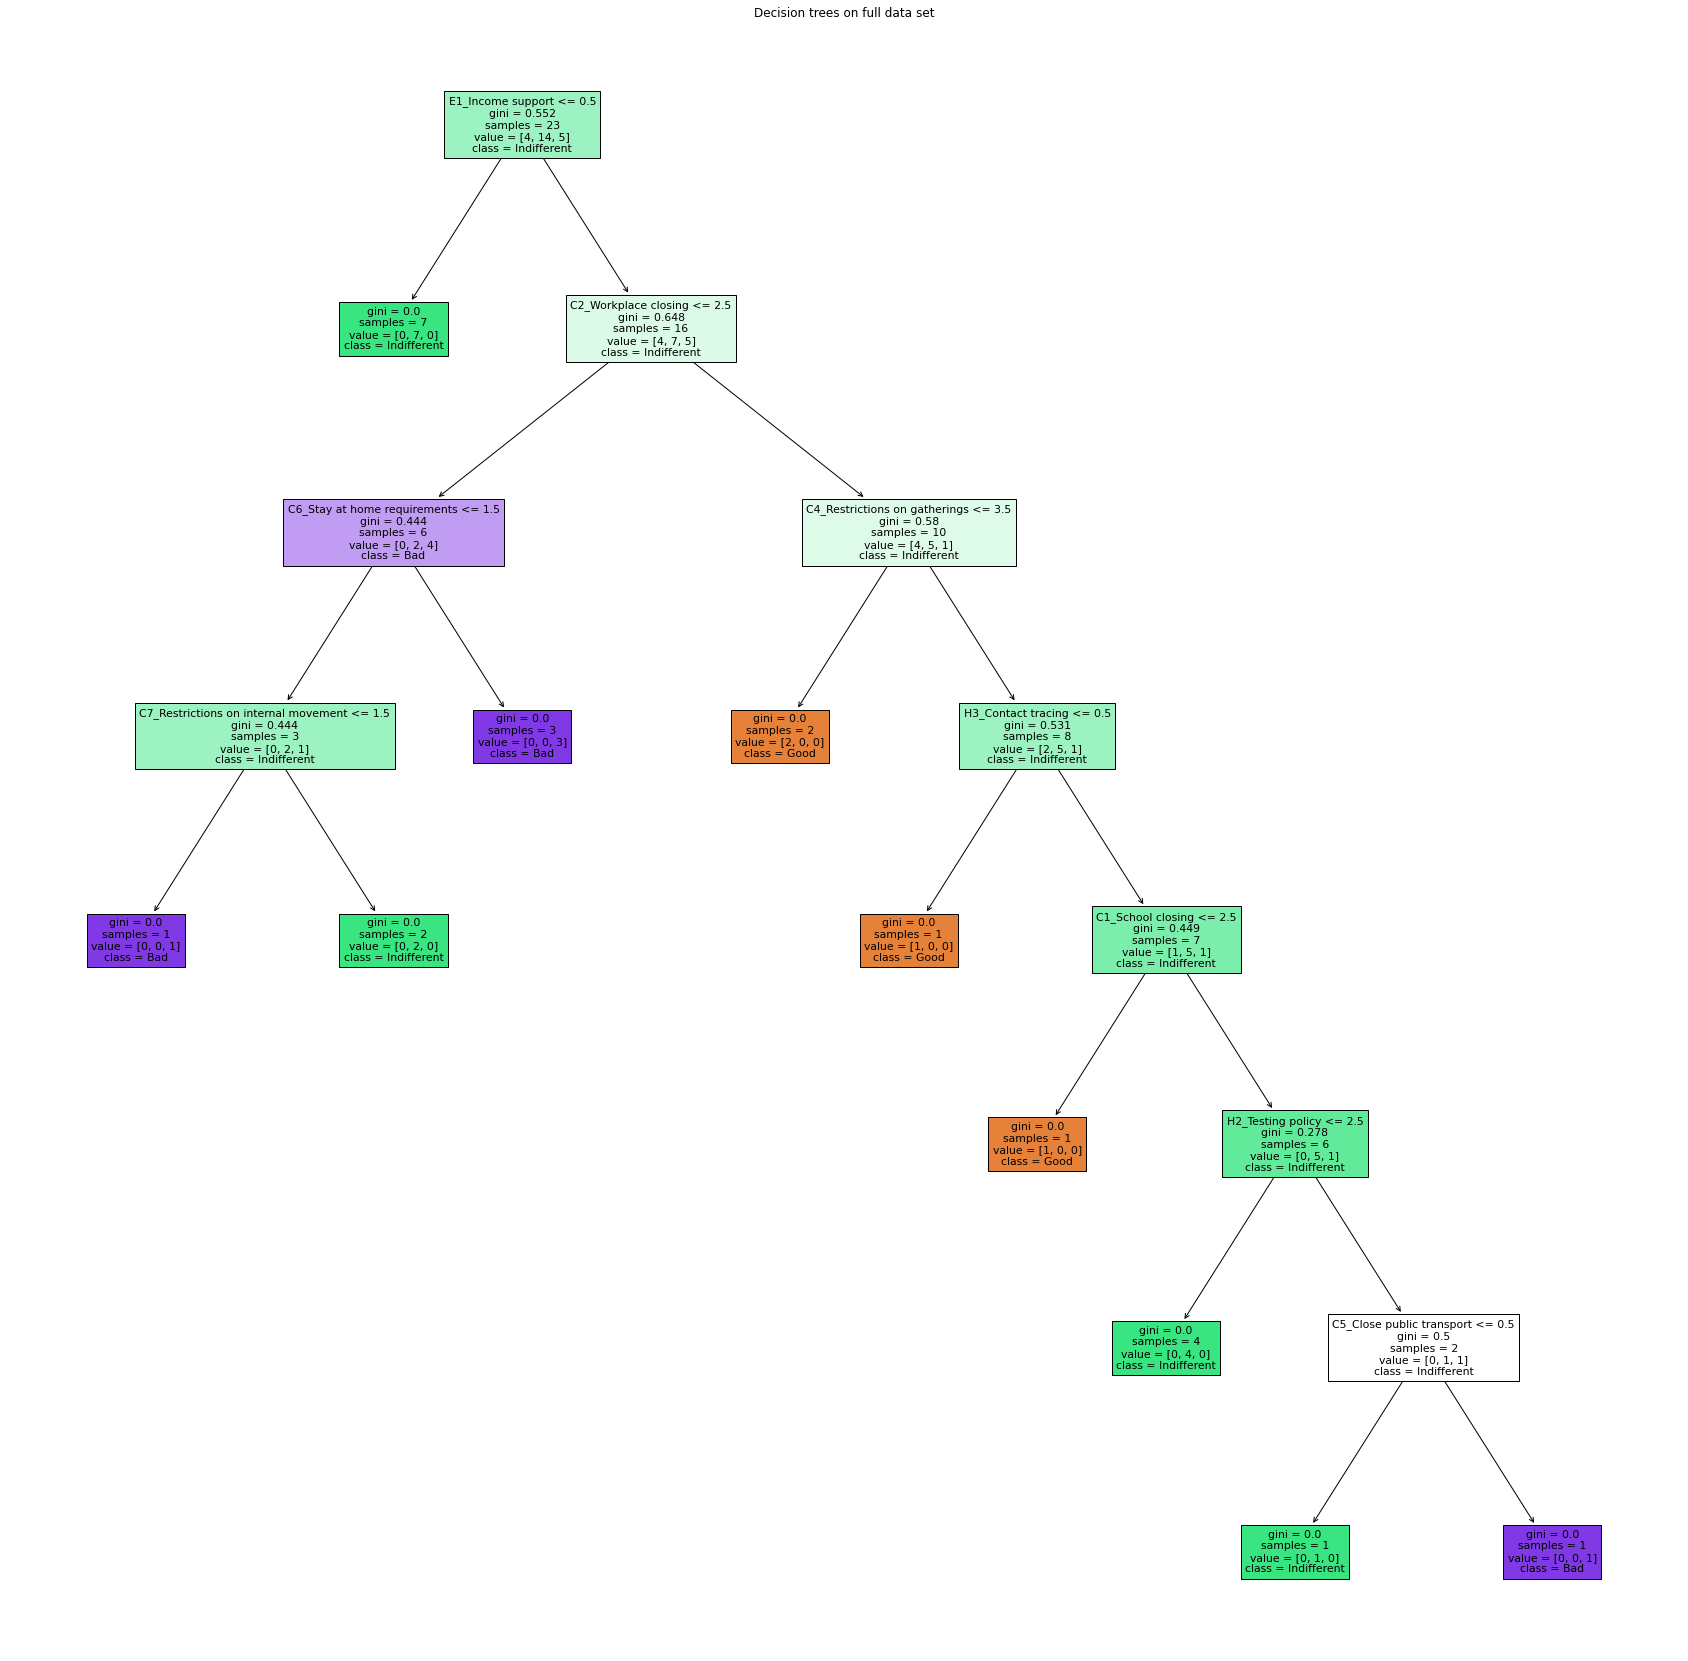

In [0]:
plt.figure(figsize=(30,30))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['Good', 'Indifferent', 'Bad'])
plt.title("Decision trees on full data set")
plt.show() 



In [0]:
labels.unique()

array([1, 0, 2])

In [0]:
#df.to_excel("Dataset.xlsx") 